In [40]:
import datetime
import os
import pickle

import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [41]:
from ava_asd.config import read_config
from ava_asd.annotation import  load_annotation_file
from ava_asd.utils import get_vid_width_height, get_frame_filename, get_start_ts

In [42]:
data_path = 'data'
config = read_config('configs/config.yaml')
fps = config['fps']
eps = config['eps']
test_ann_file = os.path.join(data_path, config['test_annotations_full'])
extracted_path = os.path.join(data_path, config['extracted_path'])

In [43]:
eps

3.0

In [44]:
test_ann = load_annotation_file(test_ann_file)

In [45]:
ann_window = test_ann[10]

In [46]:
len(ann_window)

5

In [47]:
ann = ann_window[4]

start_ts_filename = config['start_ts']
start_ts = get_start_ts(extracted_path, ann.vid_id, start_ts_filename)
img_file = get_frame_filename(extracted_path, ann, start_ts, fps)
img=mpimg.imread(img_file)
print(ann.label)

SPEAKING_AUDIBLE


In [48]:
width, height = get_vid_width_height(extracted_path, ann.vid_id)

x1 = int(ann.bbox[0] * width)
y1 = int(ann.bbox[1] * height)
x2 = int(ann.bbox[2] * width)
y2 = int(ann.bbox[3] * height)
width = x2 - x1
height = y2 - y1

print(y1)

102


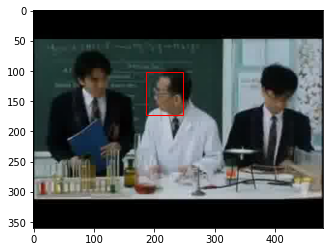

In [49]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r',facecolor='none')

# Apply rectangle
ax.add_patch(rect)

In [50]:
str(datetime.timedelta(seconds=ann.timestamp))

'0:19:24.430000'

In [51]:
audiopath = os.path.join(data_path, config['extracted_path'], ann_window[0].vid_id, 'mfcc.pkl')
mfccs = pickle.load(open(audiopath, 'rb'))

In [52]:
mfccs.data

array([[ 0.618464  ,  0.4966344 ,  0.40545297, ..., -0.21211724,
        -0.24026628, -0.75090665],
       [ 0.8298651 ,  0.82367915,  0.77779615, ..., -0.58472353,
        -0.74224293, -1.487334  ],
       [-0.71070933, -0.2624822 , -0.13625081, ..., -0.3716726 ,
        -0.48743916, -0.91640735],
       ...,
       [-2.163851  , -1.1216279 , -0.96879625, ...,  0.2933643 ,
        -0.33209085,  0.8187041 ],
       [ 0.07497323,  0.4602332 , -0.4110026 , ...,  0.08394585,
        -0.99908525,  0.6783686 ],
       [-0.9719415 , -0.22492728, -1.158027  , ...,  1.4033942 ,
        -0.25149882,  1.3620963 ]], dtype=float32)

In [53]:
audio_window_size = int(config['mfcc_frame_size'] * config['sequence_size'])
end_idx = int((ann_window[-1].timestamp - mfccs.timestamp) / mfccs.stride)
start_idx = int(end_idx - audio_window_size)

start = start_idx
end = start + audio_window_size

In [54]:
mfcc_slice = mfccs.data[:,start:end]

In [55]:
mfcc_slice.shape

(13, 20)

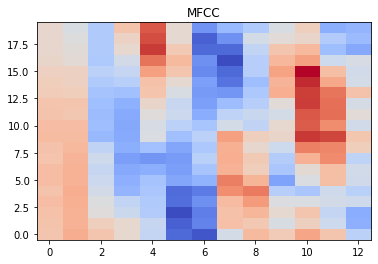

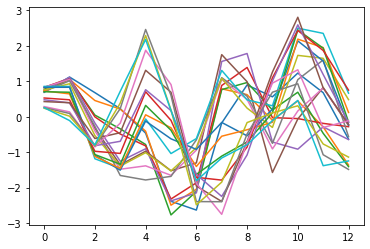

In [56]:
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_slice, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_slice)
plt.show()